In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time

In [3]:
from classes.photon_class import Photon, Photon_Simulation, create_doms

In [68]:
mpl.rcParams["xtick.labelsize"] = 15
mpl.rcParams["ytick.labelsize"] = 15
mpl.rcParams["axes.labelsize"] = 20
mpl.rcParams["legend.fontsize"] = 15

In [37]:
Nphotons = 200
dt = 1.0
tInit = 0.0
PA = 0.01
PS = 0.05
pInit = [0.0, 0.0]
dInit = "random" #0.0


xlim = [-40, 40]
ylim = [-40, 40]
dx = 20
dy = 20
r = 2

DOMs = create_doms(xlim, ylim, dx, dy, r)

params = dict(dt=dt, PA=PA, PS=PS, initial_position=pInit, initial_direction=dInit,
              DOM_attributes=DOMs, time=tInit)

sim = Photon_Simulation(Nphotons, **params)

tstart = time.time()
sim.simulate_photons()
tend = time.time()

print
print "Simulation took %s seconds" %  (tend-tstart)


 200 out of 200 photons have been simulated  
Simulation took 0.577546834946 seconds


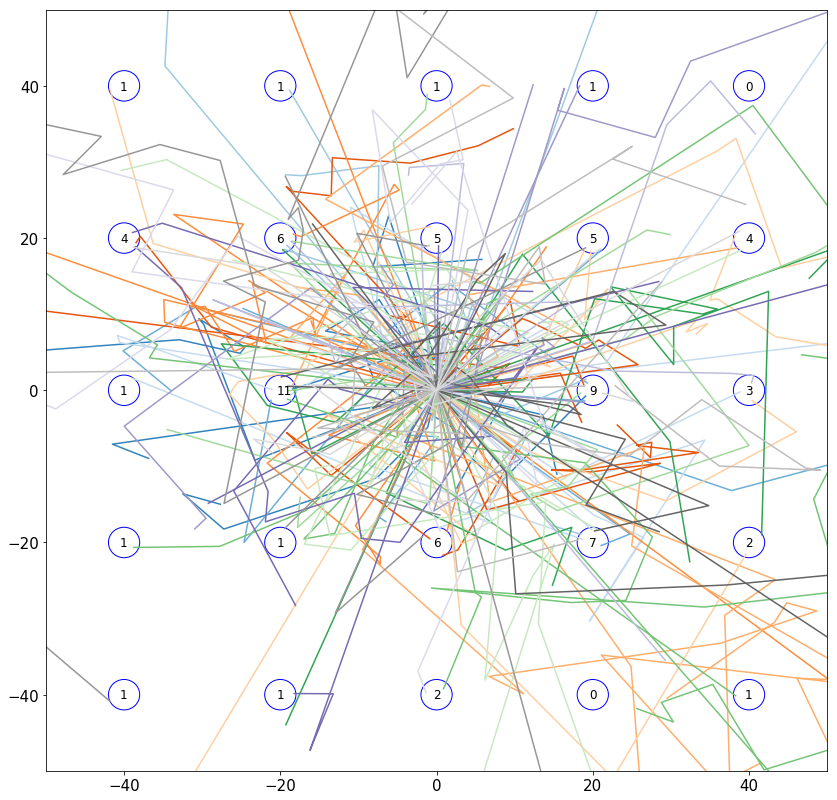

In [38]:
grid = [[-50, 50],
        [-50, 50]]
sim.plot_photons(grid=grid)

In [34]:
xlim = [-40, 40]
ylim = [-40, 40]
dx = 20
dy = 20
r = 2

DOMs = create_doms(xlim, ylim, dx, dy, r)
params["DOM_attributes"] = DOMs

In [35]:
times = []
Ns = []

NphotonTrials = [5, 10, 50, 100, 500, 1000, 2000, 5000, 10000, 20000]

for Nphotons in NphotonTrials:
    tstart = time.time()
    sim = Photon_Simulation(Nphotons, **params)
    sim.simulate_photons()
    tend = time.time()

    times.append(tend-tstart)
    Ns.append(Nphotons)

# print
# print "Simulation took %s seconds" %  (tend-tstart)

 20000 out of 20000 photons have been simulated                                                                                             


Text(0,0.5,'Time [s]')

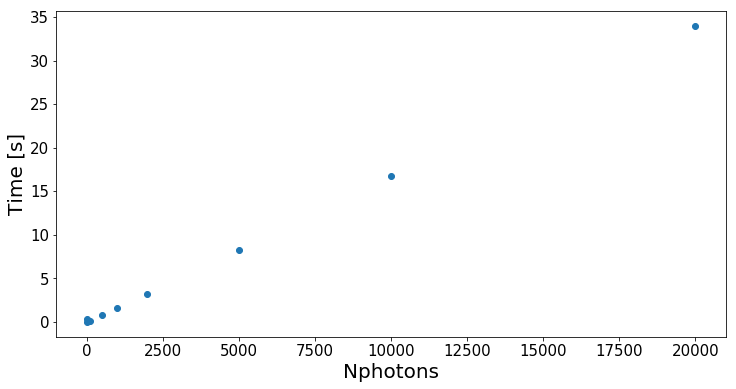

In [33]:
plt.figure(figsize=(12,6))
plt.scatter(Ns, times)

plt.xlabel("Nphotons")
plt.ylabel("Time [s]")
# plt.xscale("log")
# plt.yscale("log")

In [63]:
Nphotons = 200
dt = 1.0
tInit = 0.0
PA = 0.01
PS = 0.05
pInit = [0.0, 0.0]
dInit = "random" #0.0


xlim = [-40, 40]
ylim = [-40, 40]
dx = 40
dy = 40
r = 2

DOMs = create_doms(xlim, ylim, dx, dy, r)

params = dict(dt=dt, PA=PA, PS=PS, initial_position=pInit, initial_direction=dInit,
              DOM_attributes=DOMs, time=tInit, verbose=False)

dom_hits = []
times = []
for i in range(1000):
    if i%10 == 0:
        print i
    # Start time
    tstart = time.time()
    # Simulate
    sim = Photon_Simulation(Nphotons, **params)
    sim.simulate_photons()
    hits = sim.get_DOM_hits()
    dom_hits.append(hits)
    # End time
    tend = time.time()
    times.append(tend-tstart)

dom_hits = np.array(dom_hits)
times = np.array(times)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


In [65]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import factorial

In [66]:
def poisson(k, l):
    return (np.exp(-l)*(l**k)) / factorial(k)

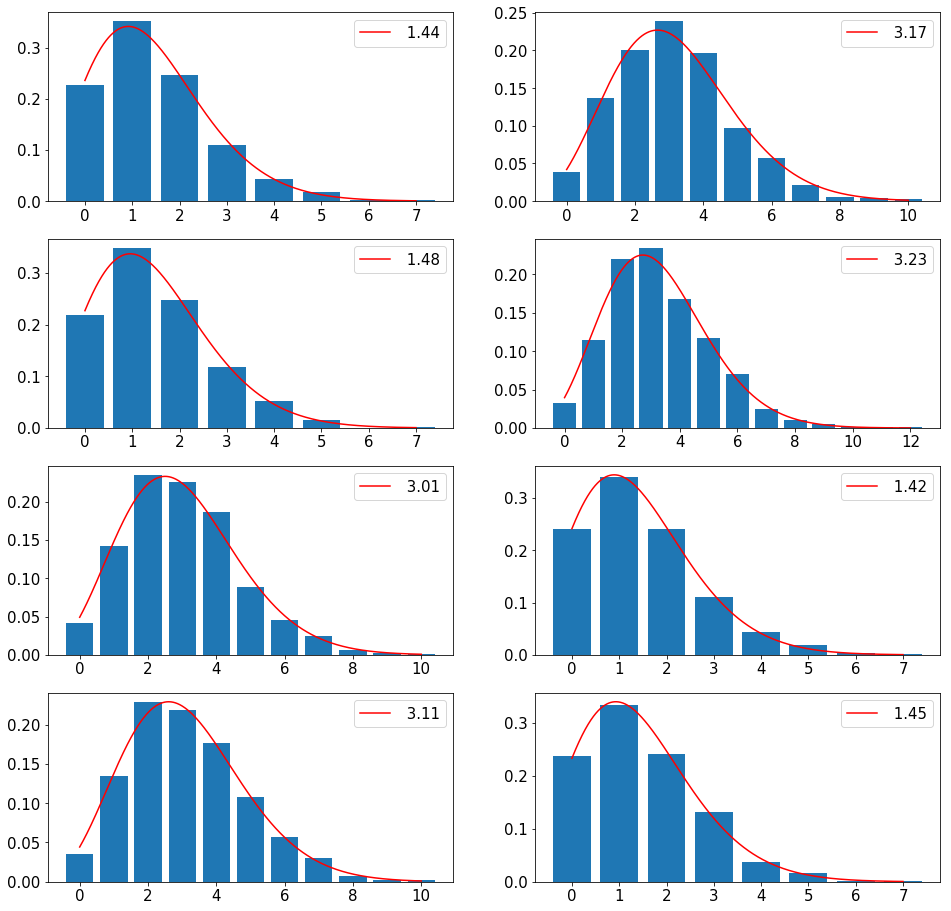

In [69]:
fig, axes = plt.subplots(4,2, figsize=(16,16))
axes = axes.flatten()

for i, ax in enumerate(axes):
    d = dom_hits[:,i]
    u, c = np.unique(d, return_counts=True)
    c = c.astype(float)
    c /= sum(c)
    popt, pcov = curve_fit(poisson, u, c)
    
    xmin, xmax = min(u), max(u)
    x = np.linspace(xmin, xmax, 1000)
    y = poisson(x, popt)
    
    ax.plot(x, y, color="r", zorder=3, label="%5.4s" % popt[0])
    ax.bar(u, c)
    ax.legend()